In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import precision_score, confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform
from sklearn.preprocessing import StandardScaler

In [366]:
data = pd.read_csv('data/notebook-01.csv')
data.head()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,...,Ocean_Name_Atlantic,Ocean_Name_Indian,Ocean_Name_Pacific,Ocean_Name_Red Sea,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Term_Type_El Niño,Term_Type_La Niña,Term_Type_Neutral
0,2501,10324336,23.163,-82.5260,8519.23,0.0287,49.90,15,9,2005,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3467,10324754,-17.575,-149.7833,1431.62,0.0262,51.20,15,3,1991,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1794,10323866,18.369,-64.5640,182.33,0.0429,61.52,15,1,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8647,10328028,17.760,-64.5680,313.13,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,8648,10328029,17.769,-64.5830,792.00,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [367]:
data.isnull().sum()

Site_ID                                  0
Sample_ID                                0
Latitude_Degrees                         0
Longitude_Degrees                        0
Distance_to_Shore                        0
Turbidity                                0
Cyclone_Frequency                        0
Date_Day                                 0
Date_Month                               0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Freque

In [368]:
imp_cols = data[['Latitude_Degrees',                       
'Longitude_Degrees',
'SSTA_Standard_Deviation',
'Date_Year',  
'Depth_m',                     
'Distance_to_Shore',  
'TSA_DHW',  
'ClimSST',                                                  
'Percent_Bleaching']]

In [369]:
imp_cols.head()

,Latitude_Degrees,Longitude_Degrees,SSTA_Standard_Deviation,Date_Year,Depth_m,Distance_to_Shore,TSA_DHW,ClimSST,Percent_Bleaching
0,23.163,-82.5260,1.0,2005,10.00,8519.23,0.00,301.61,50.2
1,-17.575,-149.7833,1.0,1991,14.00,1431.62,0.26,262.15,50.7
2,18.369,-64.5640,1.0,2006,7.00,182.33,0.00,298.79,50.9
3,17.760,-64.5680,1.0,2006,9.02,313.13,0.00,300.16,50.9
4,17.769,-64.5830,1.0,2006,12.50,792.00,0.00,300.15,50.9


In [370]:
imp_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Latitude_Degrees         32678 non-null  float64
 1   Longitude_Degrees        32678 non-null  float64
 2   SSTA_Standard_Deviation  32678 non-null  float64
 3   Date_Year                32678 non-null  int64  
 4   Depth_m                  32678 non-null  float64
 5   Distance_to_Shore        32678 non-null  float64
 6   TSA_DHW                  32678 non-null  float64
 7   ClimSST                  32678 non-null  float64
 8   Percent_Bleaching        32678 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.2 MB


In [371]:
imp_cols = imp_cols.drop_duplicates(keep='last')

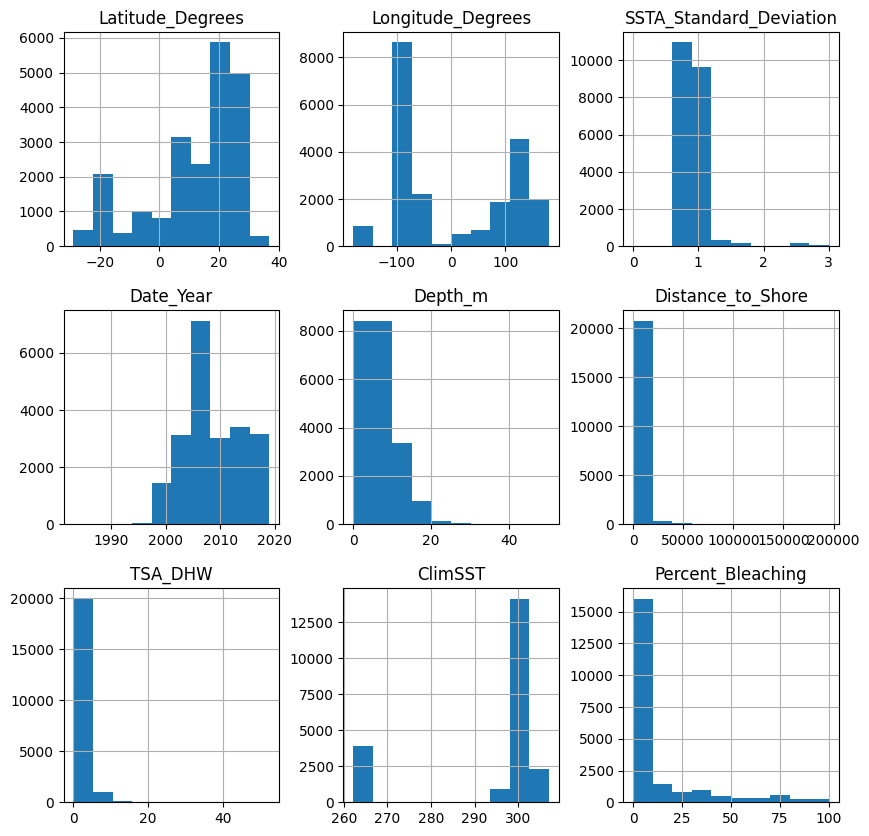

In [372]:
imp_cols.hist(figsize=(10,10))
plt.show()

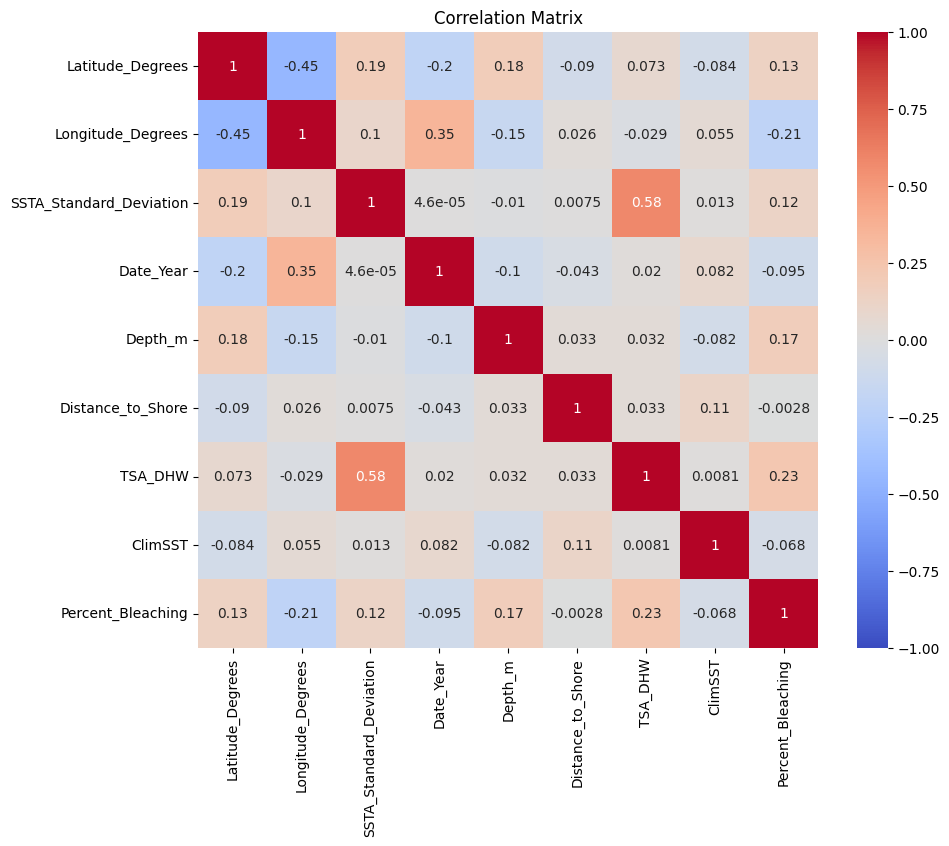

In [374]:
# Compute the correlation matrix
corr_matrix = imp_cols.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [54]:
imp_cols.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'SSTA_Standard_Deviation',
       'Date_Year', 'Depth_m', 'Distance_to_Shore', 'TSA_DHW', 'ClimSST',
       'Percent_Bleaching', 'Bleached'],
      dtype='object')

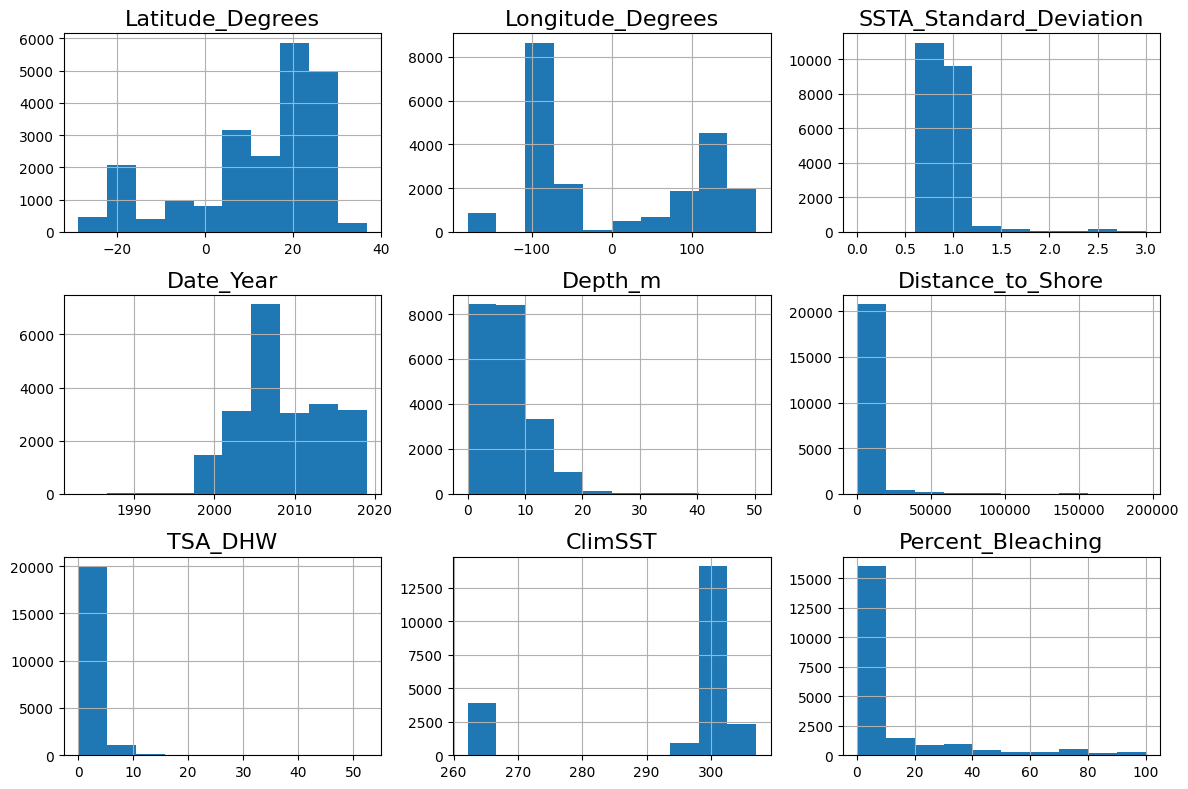

In [55]:
# List of columns in the imp_cols dataset
features = imp_cols.columns.tolist()

# Specify the categorical feature to exclude
categorical_feature = 'Bleached'

# Exclude the categorical feature from the features list
features_to_plot = [feature for feature in features if feature != categorical_feature]

# Create a 2x5 grid (2 rows and 5 columns) for the histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Adjust figsize if necessary

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for the first 10 features
for i, feature in enumerate(features_to_plot[:10]):
    imp_cols[feature].hist(ax=axes[i], bins=10)  # You can adjust bins as necessary
    axes[i].set_title(feature, fontsize = 16)

# Hide any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [56]:
columns_to_transform = ['SSTA_Standard_Deviation',
'Date_Year',  
'Depth_m',                     
'Distance_to_Shore',  
'TSA_DHW',  
'ClimSST',                                                  
'Percent_Bleaching']
imp_cols[columns_to_transform] = np.log(imp_cols[columns_to_transform]+1)

In [57]:
# imp_cols.hist(figsize=(10,10))
# plt.show()

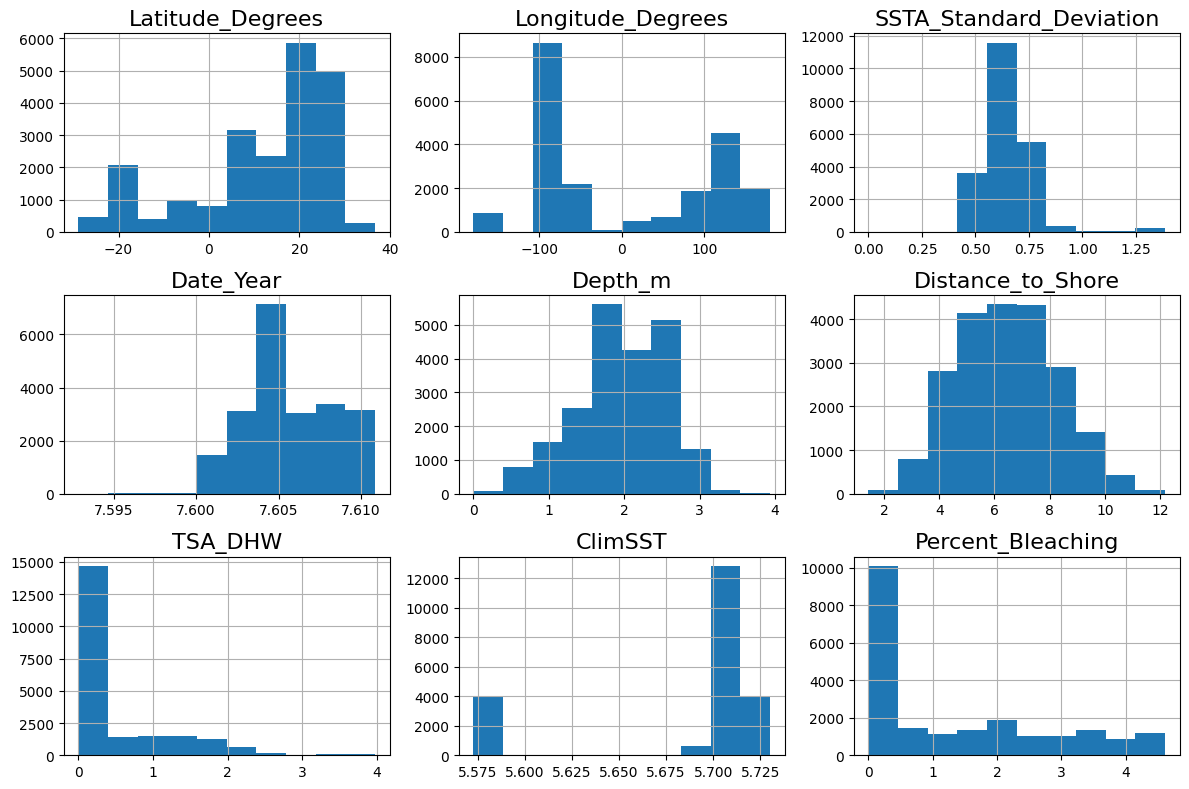

In [58]:
# List of columns in the imp_cols dataset
features = imp_cols.columns.tolist()

# Specify the categorical feature to exclude
categorical_feature = 'Bleached'

# Exclude the categorical feature from the features list
features_to_plot = [feature for feature in features if feature != categorical_feature]

# Create a 2x5 grid (2 rows and 5 columns) for the histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Adjust figsize if necessary

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for the first 10 features
for i, feature in enumerate(features_to_plot[:10]):
    imp_cols[feature].hist(ax=axes[i], bins=10)  # You can adjust bins as necessary
    axes[i].set_title(feature, fontsize = 16)

# Hide any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [59]:
X = imp_cols.drop(columns=['Percent_Bleaching', 'Bleached'], axis=1)
y = imp_cols['Percent_Bleaching']

In [60]:
print(X.shape)
print(y.shape)

(21341, 8)
(21341,)


In [61]:
imp_cols.isnull().sum()

Latitude_Degrees           0
Longitude_Degrees          0
SSTA_Standard_Deviation    0
Date_Year                  0
Depth_m                    0
Distance_to_Shore          0
TSA_DHW                    0
ClimSST                    0
Percent_Bleaching          0
Bleached                   0
dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = Lin_reg.predict(X_test)
y_pred_train = Lin_reg.predict(X_train)

# Calculate mean squared error in original scale
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error in Original Scale: {mse}")
r2_lin_reg_test = r2_score(y_test, y_pred)
print(f'R-squared: {r2_lin_reg_test}')
r2_lin_reg_train = r2_score(y_train, y_pred_train)
print(f'R-squared train: {r2_lin_reg_train}')

Mean Squared Error in Original Scale: 1.5539425621691787
R-squared: 0.26513505245582325
R-squared train: 0.26348668990815727


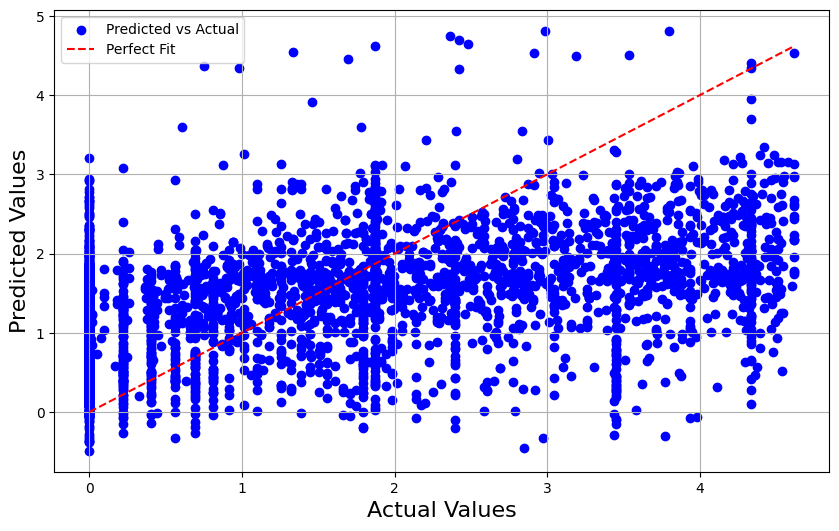

In [65]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16)
# plt.title('Actual vs Predicted Values lin-reg')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))




Ridge Model............................................

The train score for ridge model is 0.263486619415097
The test score for ridge model is 0.26513024820939335


In [68]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0007506677795101613


In [69]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.26348666634894113
0.2651373273180394


In [70]:
rf_reg = RandomForestRegressor(n_estimators=100, oob_score=True)

In [71]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [72]:
# Access the OOB Score
oob_score = rf_reg.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
y_pred = rf_reg.predict(X_test)
y_pred_train = rf_reg.predict(X_train)
 
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error test: {mse}')
 
r2_rf_test = r2_score(y_test, y_pred)
print(f'R-squared test: {r2_rf_test}')

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error train: {mse_train}')
 
r2_rf_train = r2_score(y_train, y_pred_train)
print(f'R-squared train: {r2_rf_train}')

Out-of-Bag Score: 0.7453639721470225
Mean Squared Error test: 0.5447569580976298
R-squared test: 0.7423825029427589
Mean Squared Error train: 0.08604433019262685
R-squared train: 0.9605600450959667


In [73]:
# n_estimators = 100 Rsquared : 0.7523 obs: 0.7493
# n_estimators = 200 Rsquared: 0.7537 obs: 0.7528

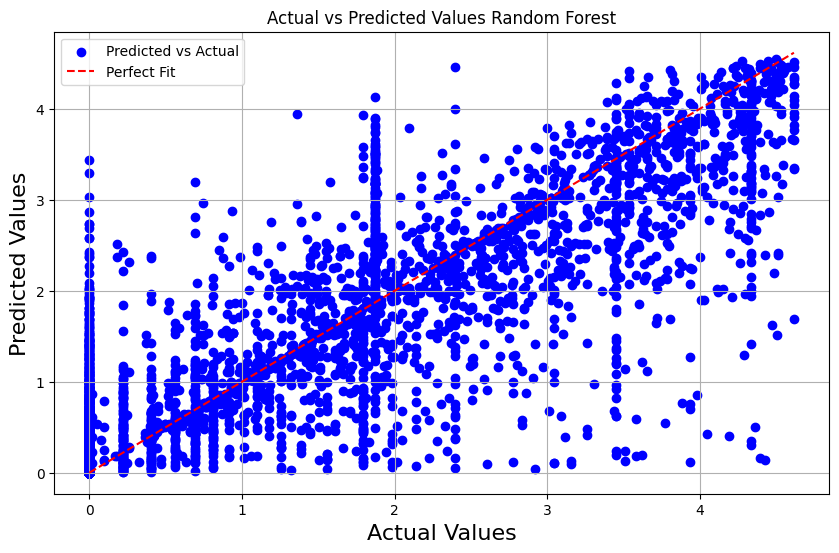

In [74]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16)
plt.title('Actual vs Predicted Values Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestRegressor(random_state=42)
gr_space = {  
  'max_depth': [18],
  'bootstrap': [True, False],
  'min_samples_split': [4],
  'min_samples_leaf': [2],
  'max_features': [None,'sqrt', 'log2'],
}

grid = GridSearchCV(rf_grid, gr_space, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are: ' + str(model_grid.best_params_))
print('Best score (negative MSE) is: ' + str(model_grid.best_score_))

# Get the best model
best_rf_model = model_grid.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared value on test set: {:.4f}'.format(r2))

# Optional: Calculate and print R-squared on training set
y_train_pred = best_rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print('R-squared value on training set: {:.4f}'.format(r2_train))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hyperparameters are: {'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score (negative MSE) is: -0.5775897084451637
R-squared value on test set: 0.7522
R-squared value on training set: 0.9374


In [79]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestRegressor(random_state=42)
gr_space = {  
  'max_depth': [8, 10],
  'bootstrap': [True, False],
  'min_samples_split': [2, 4],
  'min_samples_leaf': [1, 2],
  'max_features': [None, 'sqrt', 'log2'],
}

grid = GridSearchCV(rf_grid, gr_space, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are: ' + str(model_grid.best_params_))
print('Best score (negative MSE) is: ' + str(model_grid.best_score_))

# Get the best model
best_rf_model = model_grid.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared value on test set: {:.4f}'.format(r2))

# Optional: Calculate and print R-squared on training set
y_train_pred = best_rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print('R-squared value on training set: {:.4f}'.format(r2_train))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best hyperparameters are: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score (negative MSE) is: -0.6770834824340884
R-squared value on test set: 0.6957
R-squared value on training set: 0.7665


In [33]:
# Train the XGBoost model
eval_set = [(X_test, y_test)]
weights = np.where(y_train < 1, 1, 10)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators = 100, early_stopping_rounds=50, sample_weight = weights, eval_metric="logloss",verbose=True)
xgb_model.fit(X_train, y_train,  eval_set=eval_set )

# Predict using XGBoost model
xgb_pred = xgb_model.predict(X_test)

y_pred_train = xgb_model.predict(X_train)
 
# Evaluating the model
mse = mean_squared_error(y_test, xgb_pred)
print(f'Mean Squared Error test: {mse}')
 
r2_xgb_test = r2_score(y_test, xgb_pred)
print(f'R-squared test: {r2_xgb_test}')

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error train: {mse_train}')
 
r2_xgb_train = r2_score(y_train, y_pred_train)
print(f'R-squared train: {r2_xgb_train}')

[0]	validation_0-logloss:-11.94634
[1]	validation_0-logloss:-21.48636
[2]	validation_0-logloss:-21.99648
[3]	validation_0-logloss:-22.25990
[4]	validation_0-logloss:-22.48264
[5]	validation_0-logloss:-22.53915
[6]	validation_0-logloss:-22.90508
[7]	validation_0-logloss:-23.03279
[8]	validation_0-logloss:-23.11712
[9]	validation_0-logloss:-23.13663
[10]	validation_0-logloss:-23.21734
[11]	validation_0-logloss:-23.24775
[12]	validation_0-logloss:-23.29582
[13]	validation_0-logloss:-23.40214
[14]	validation_0-logloss:-23.49933
[15]	validation_0-logloss:-23.54117
[16]	validation_0-logloss:-23.60761
[17]	validation_0-logloss:-23.57713
[18]	validation_0-logloss:-23.61503
[19]	validation_0-logloss:-23.67913
[20]	validation_0-logloss:-23.66665
[21]	validation_0-logloss:-23.72349
[22]	validation_0-logloss:-23.73648
[23]	validation_0-logloss:-23.77704
[24]	validation_0-logloss:-23.80438
[25]	validation_0-logloss:-23.80519
[26]	validation_0-logloss:-23.83528


g:\LEEDS\Dissertation\coral-bleaching\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sample_weight", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[27]	validation_0-logloss:-23.85258
[28]	validation_0-logloss:-23.85738
[29]	validation_0-logloss:-23.88950
[30]	validation_0-logloss:-23.90067
[31]	validation_0-logloss:-23.88935
[32]	validation_0-logloss:-23.84412
[33]	validation_0-logloss:-23.83725
[34]	validation_0-logloss:-23.87486
[35]	validation_0-logloss:-23.87847
[36]	validation_0-logloss:-23.87083
[37]	validation_0-logloss:-23.89507
[38]	validation_0-logloss:-23.91463
[39]	validation_0-logloss:-23.89665
[40]	validation_0-logloss:-23.90088
[41]	validation_0-logloss:-23.97634
[42]	validation_0-logloss:-23.94169
[43]	validation_0-logloss:-24.01173
[44]	validation_0-logloss:-24.04649
[45]	validation_0-logloss:-24.03769
[46]	validation_0-logloss:-23.97131
[47]	validation_0-logloss:-23.98427
[48]	validation_0-logloss:-23.92275
[49]	validation_0-logloss:-23.93500
[50]	validation_0-logloss:-24.04171
[51]	validation_0-logloss:-24.04641
[52]	validation_0-logloss:-24.05922
[53]	validation_0-logloss:-24.05475
[54]	validation_0-logloss:-2

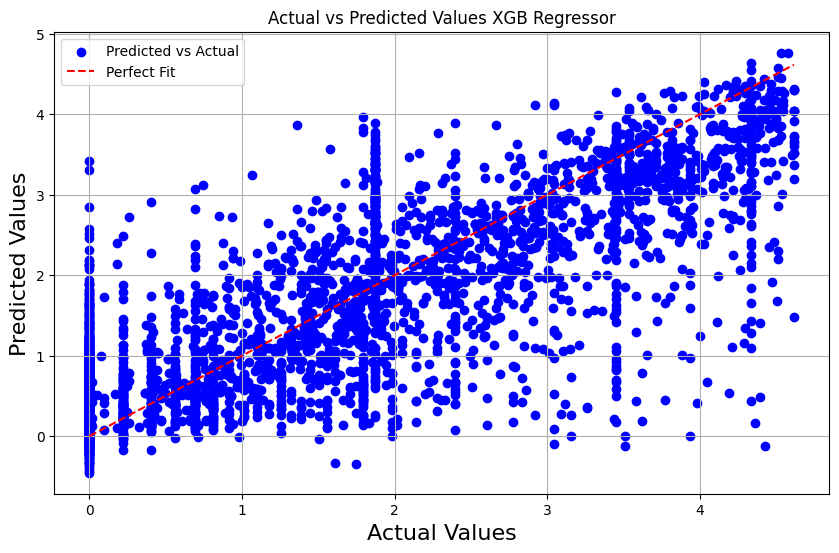

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16)
plt.title('Actual vs Predicted Values XGB Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV
xgb_grid = xgb.XGBRegressor(random_state=42)
gr_space = { 
    "learning_rate": (0.01, 0.05),
    "max_depth": [4, 6],
    "min_child_weight": [ 3, 5, 7],
    "gamma":[ 0.0, 0.1],
    "colsample_bytree":[0.4, 0.5, 0.6],
}

grid = GridSearchCV(xgb_grid, gr_space, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are: ' + str(model_grid.best_params_))
print('Best score (negative MSE) is: ' + str(model_grid.best_score_))

# Get the best model
best_rf_model = model_grid.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared value on test set: {:.4f}'.format(r2))

# Optional: Calculate and print R-squared on training set
y_train_pred = best_rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print('R-squared value on training set: {:.4f}'.format(r2_train))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters are: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 3}
Best score (negative MSE) is: -0.7304764165947454
R-squared value on test set: 0.6674
R-squared value on training set: 0.7098


<!-- - rf (without) score - overfitting in results
- rf (with) score - two cases - handle overfitting or improve test performance
- implication : better to opt for generalizing model where performance can be increased with addition of more data and variance

- xgb (without) score - overfitting in results
- xgb (with) score - two cases - handle overfitting or improve test performance
- implication : better to opt for generalizing model where performance can be increased with addition of more data and variance -->

- rf score and xgb score (without)
- rf score and xgb score (with)
- implication : better to opt for generalizing model where performance can be increased with addition of more data and variance !!!!

(grid search  aims to find best set of params to improve train r2)
(this set of params is checked on test - grid never sees the test set before)

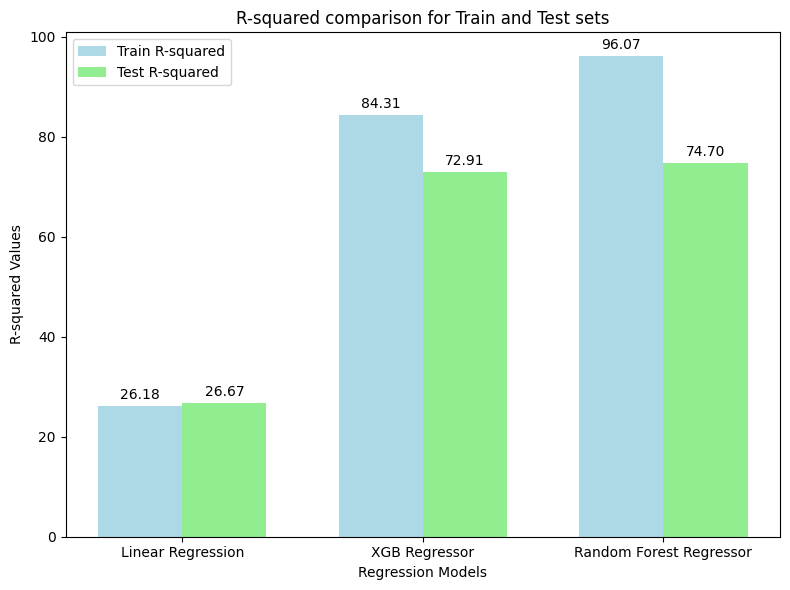

In [35]:
r2_train = {
    'Linear Regression': 26.18,
    'XGB Regressor': 84.31,
    'Random Forest Regressor': 96.07
}

r2_test = {
    'Linear Regression': 26.67,
    'XGB Regressor': 72.91,
    'Random Forest Regressor': 74.70
}

# Extract the models and their corresponding R-squared values
models = list(r2_train.keys())
train_values = list(r2_train.values())
test_values = list(r2_test.values())

# Set up bar positions
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for train and test R-squared values
rects1 = ax.bar(x - width/2, train_values, width, label='Train R-squared', color='lightblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test R-squared', color='lightgreen')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Regression Models')
ax.set_ylabel('R-squared Values')
ax.set_title('R-squared comparison for Train and Test sets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of the bars
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

# Display the plot
plt.tight_layout()
plt.show()



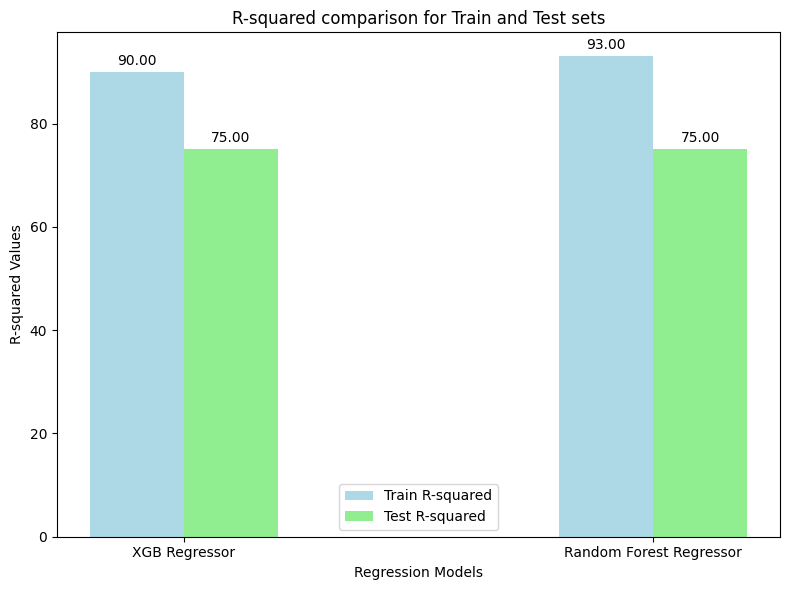

In [54]:
r2_train = {
    'XGB Regressor': 90,
    'Random Forest Regressor': 93
}

r2_test = {
    'XGB Regressor': 75,
    'Random Forest Regressor': 75
}

# Extract the models and their corresponding R-squared values
models = list(r2_train.keys())
train_values = list(r2_train.values())
test_values = list(r2_test.values())

# Set up bar positions
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for train and test R-squared values
rects1 = ax.bar(x - width/2, train_values, width, label='Train R-squared', color='lightblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test R-squared', color='lightgreen')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Regression Models')
ax.set_ylabel('R-squared Values')
ax.set_title('R-squared comparison for Train and Test sets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of the bars
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

# Display the plot
plt.tight_layout()
plt.show()



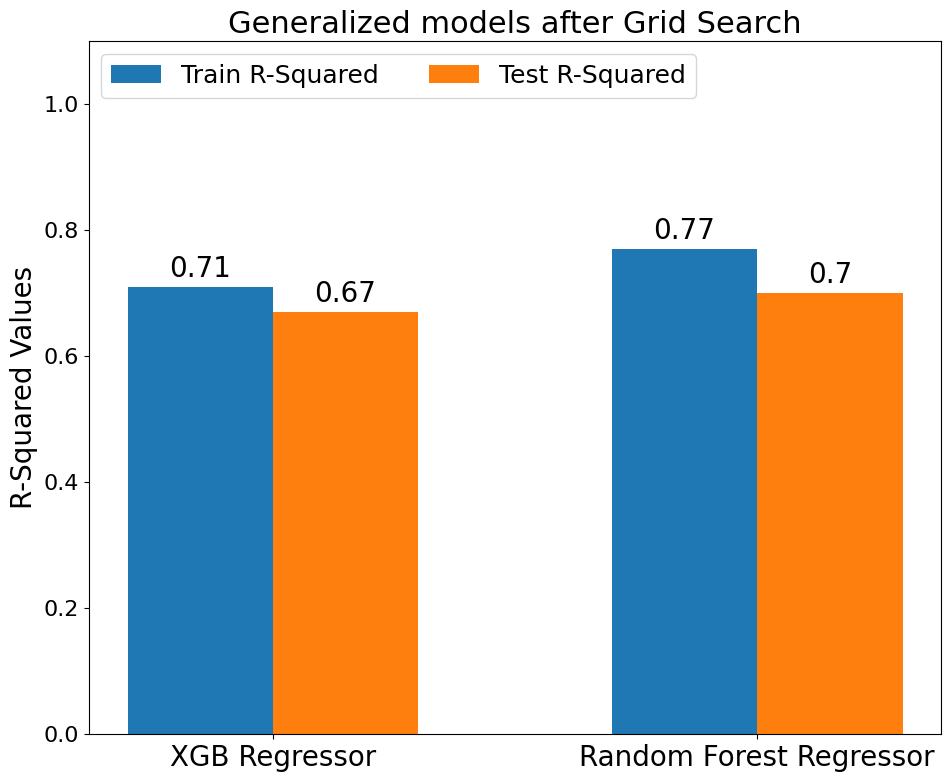

In [355]:
models = ("XGB Regressor", "Random Forest Regressor")
r_2 = {
    'Train R-Squared': (0.71, 0.77),
    'Test R-Squared': (0.67, 0.70),
}

x = np.arange(len(models))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(11, 9))

for attribute, measurement in r_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize = 20)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R-Squared Values', fontsize = 20)
ax.set_title('Generalized models after Grid Search', fontsize = 22)
ax.set_xticks(x + width /2, models)
ax.set_xticklabels(models, fontsize = 20) 
ax.legend(loc='upper left', ncols=2, fontsize = 18)
ax.set_ylim(0, 1.1)
ax.tick_params(axis='y', labelsize=16) 
plt.show()

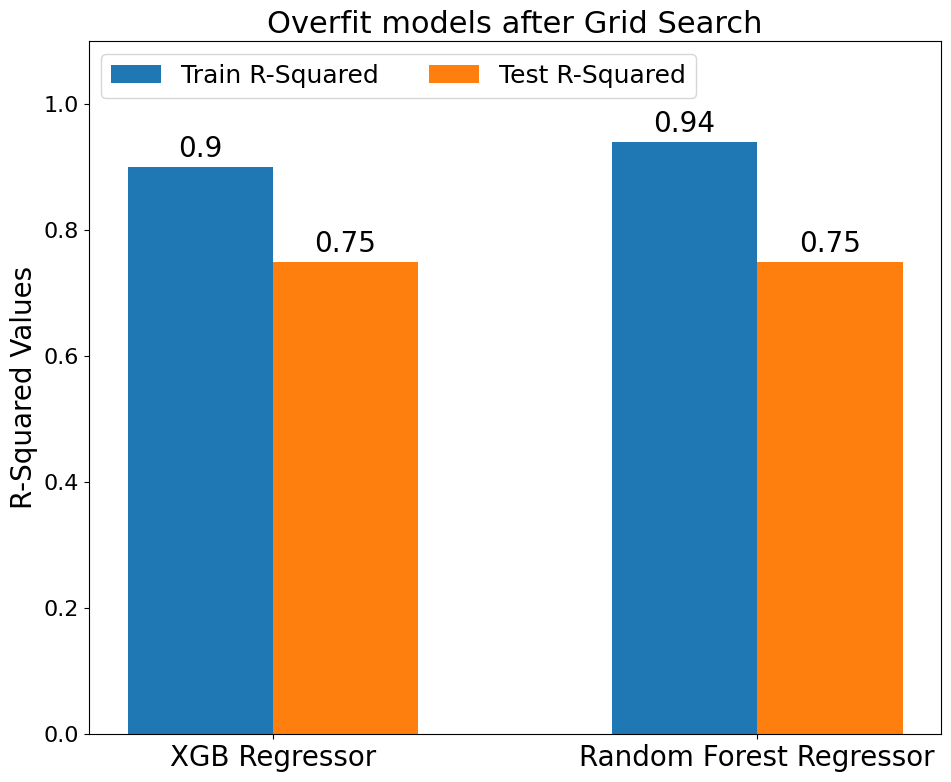

In [353]:
models = ("XGB Regressor", "Random Forest Regressor")
r_2 = {
    'Train R-Squared': (0.90, 0.94),
    'Test R-Squared': (0.75, 0.75),
}

x = np.arange(len(models))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(11, 9))

for attribute, measurement in r_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize = 20)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R-Squared Values', fontsize = 20)
ax.set_title('Overfit models after Grid Search', fontsize = 22)
ax.set_xticks(x + width /2, models)
ax.set_xticklabels(models, fontsize = 20) 
ax.legend(loc='upper left', ncols=2, fontsize = 18)
ax.set_ylim(0, 1.1)
ax.tick_params(axis='y', labelsize=16) 
plt.show()

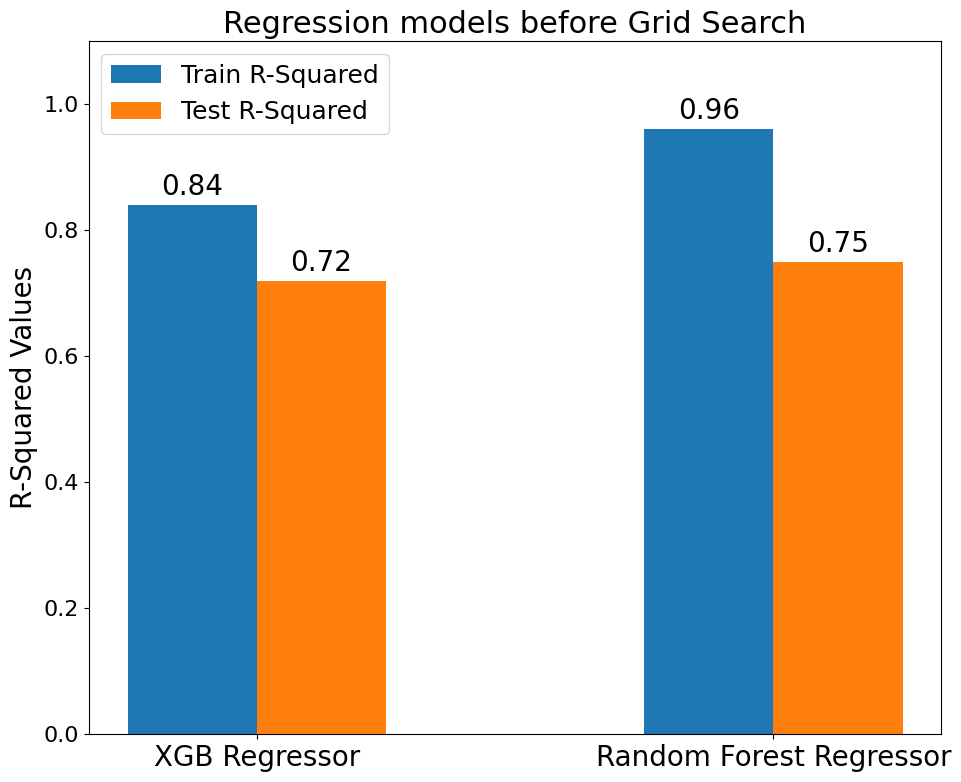

In [354]:
models = ("XGB Regressor", "Random Forest Regressor")
r_2 = {
    'Train R-Squared': ( 0.84, 0.96),
    'Test R-Squared': ( 0.72, 0.75),
}

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(11, 9))

for attribute, measurement in r_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize = 20)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R-Squared Values', fontsize = 20)
ax.set_title('Regression models before Grid Search', fontsize = 22)
ax.set_xticks(x + width /2, models)
ax.set_xticklabels(models, fontsize = 20) 
ax.legend(loc='upper left', fontsize = 18)
ax.set_ylim(0, 1.1)
ax.tick_params(axis='y', labelsize=16) 
plt.show()